In [1]:
from itertools import islice

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

import pandas as pd
from sklearn.manifold import TSNE

In [4]:
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.torch.modules.distribution_output import NegativeBinomialOutput

from pts.dataset.repository.datasets import dataset_recipes

from pytorch_lightning.loggers import CSVLogger

from vq_ar import VQVAEEstimator, ImplicitQuantileNetworkOutput, QuantileLoss

In [5]:
dataset = get_dataset("exchange_rate")

In [6]:
train = list(dataset.test)

/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:321: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:324: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:335: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return timestamp.freq.rollforward(timestamp)


In [35]:
estimator = VQVAEEstimator(
        freq=dataset.metadata.freq,
        prediction_length=dataset.metadata.prediction_length,
        context_length=dataset.metadata.prediction_length*6,
        num_feat_static_cat=len(dataset.metadata.feat_static_cat),
        cardinality=[int(cat_feat_info.cardinality) for cat_feat_info in dataset.metadata.feat_static_cat],
        embedding_dimension=[2],
        vq_jitter_prob=None,
        scaling=False,
        batch_size=256,
        num_batches_per_epoch=200,
        distr_output=ImplicitQuantileNetworkOutput("positive"),
        loss=QuantileLoss(),
        trainer_kwargs=dict(gpus="1", max_epochs=30, logger=CSVLogger(".", "lightning_logs/")),
    )

In [36]:
predictor = estimator.train(
        training_data=dataset.train,
        validation_data=dataset.test,
        shuffle_buffer_length=1024,
        num_workers=8,
    )

/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
GPU available: True, used: True
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
TPU available: False, using: 0 TPU cores
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a fu

Validation sanity check: 0it [00:00, ?it/s]

/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home

/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._min_time_point, self._max_time_point, freq=start.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._min_time_point, self._max_time_point, freq=start.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._min_time_point, self._max_time_point, freq=start.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._min_time_point, self._max_time_point, freq=start.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._min_

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch 0, global step 199: val_loss reached 0.03377 (best 0.03377), saving model to "./lightning_logs/version_176/checkpoints/epoch=0-step=199.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 1, global step 399: val_loss reached 0.01778 (best 0.01778), saving model to "./lightning_logs/version_176/checkpoints/epoch=1-step=399.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 2, global step 599: val_loss reached 0.00798 (best 0.00798), saving model to "./lightning_logs/version_176/checkpoints/epoch=2-step=599.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 3, global step 799: val_loss reached 0.00641 (best 0.00641), saving model to "./lightning_logs/version_176/checkpoints/epoch=3-step=799.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 4, global step 999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 5, global step 1199: val_loss reached 0.00609 (best 0.00609), saving model to "./lightning_logs/version_176/checkpoints/epoch=5-step=1199.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 6, global step 1399: val_loss reached 0.00539 (best 0.00539), saving model to "./lightning_logs/version_176/checkpoints/epoch=6-step=1399.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 7, global step 1599: val_loss reached 0.00504 (best 0.00504), saving model to "./lightning_logs/version_176/checkpoints/epoch=7-step=1599.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 8, global step 1799: val_loss reached 0.00493 (best 0.00493), saving model to "./lightning_logs/version_176/checkpoints/epoch=8-step=1799.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 9, global step 1999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 10, global step 2199: val_loss reached 0.00488 (best 0.00488), saving model to "./lightning_logs/version_176/checkpoints/epoch=10-step=2199.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 11, global step 2399: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 12, global step 2599: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 13, global step 2799: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 14, global step 2999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 15, global step 3199: val_loss reached 0.00433 (best 0.00433), saving model to "./lightning_logs/version_176/checkpoints/epoch=15-step=3199.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 16, global step 3399: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 17, global step 3599: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 18, global step 3799: val_loss reached 0.00424 (best 0.00424), saving model to "./lightning_logs/version_176/checkpoints/epoch=18-step=3799.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 19, global step 3999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 20, global step 4199: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 21, global step 4399: val_loss reached 0.00400 (best 0.00400), saving model to "./lightning_logs/version_176/checkpoints/epoch=21-step=4399.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 22, global step 4599: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 23, global step 4799: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 24, global step 4999: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 25, global step 5199: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 26, global step 5399: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 27, global step 5599: val_loss reached 0.00358 (best 0.00358), saving model to "./lightning_logs/version_176/checkpoints/epoch=27-step=5599.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 28, global step 5799: val_loss reached 0.00347 (best 0.00347), saving model to "./lightning_logs/version_176/checkpoints/epoch=28-step=5799.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 29, global step 5999: val_loss was not in top 1


In [28]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=predictor,
)

In [29]:
forecasts = list(forecast_it)

/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._min_time_point, self._max_time_point, freq=start.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._min_time_point, self._max_time_point, freq=start.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, 

In [30]:
tss = list(ts_it)

In [31]:
evaluator = Evaluator()

In [32]:
agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))


Running evaluation: 40it [00:00, 157.23it/s]/home/kashif/gluon-ts-PR/src/gluonts/evaluation/_base.py:306: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  date_before_forecast = forecast.index[0] - forecast.index[0].freq
/home/kashif/gluon-ts-PR/src/gluonts/evaluation/_base.py:306: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  date_before_forecast = forecast.index[0] - forecast.index[0].freq



In [14]:
agg_metrics

{'MSE': 0.0002051797087181247,
 'abs_error': 11.653120258823037,
 'abs_target_sum': 975.9766580164433,
 'abs_target_mean': 0.8133138816803693,
 'seasonal_error': 0.006515919403041842,
 'MASE': 2.088430165589329,
 'MAPE': 0.012832033556575575,
 'sMAPE': 0.012796715709070367,
 'MSIS': 16.065836441523857,
 'QuantileLoss[0.1]': 4.818397011421621,
 'Coverage[0.1]': 0.13583333333333333,
 'QuantileLoss[0.2]': 8.076815254241229,
 'Coverage[0.2]': 0.2658333333333333,
 'QuantileLoss[0.3]': 10.154688914306462,
 'Coverage[0.3]': 0.35583333333333333,
 'QuantileLoss[0.4]': 11.31807127483189,
 'Coverage[0.4]': 0.41916666666666663,
 'QuantileLoss[0.5]': 11.653120258823037,
 'Coverage[0.5]': 0.4841666666666667,
 'QuantileLoss[0.6]': 11.311367158591747,
 'Coverage[0.6]': 0.545,
 'QuantileLoss[0.7]': 10.042812323197722,
 'Coverage[0.7]': 0.6258333333333332,
 'QuantileLoss[0.8]': 7.917478032037615,
 'Coverage[0.8]': 0.7266666666666667,
 'QuantileLoss[0.9]': 4.960059580579399,
 'Coverage[0.9]': 0.840000000

In [33]:
agg_metrics

{'MSE': 0.0007997825716120133,
 'abs_error': 24.013698279857635,
 'abs_target_sum': 975.9766580164433,
 'abs_target_mean': 0.8133138816803693,
 'seasonal_error': 0.006515919403041842,
 'MASE': 6.752913028005405,
 'MAPE': 0.053329433562854925,
 'sMAPE': 0.04865617619206507,
 'MSIS': 44.162862674733745,
 'QuantileLoss[0.1]': 9.535719371214508,
 'Coverage[0.1]': 0.22333333333333333,
 'QuantileLoss[0.2]': 16.22866619564593,
 'Coverage[0.2]': 0.4341666666666667,
 'QuantileLoss[0.3]': 20.680830409936608,
 'Coverage[0.3]': 0.5816666666666667,
 'QuantileLoss[0.4]': 23.283925103023652,
 'Coverage[0.4]': 0.665,
 'QuantileLoss[0.5]': 24.013698268681765,
 'Coverage[0.5]': 0.73,
 'QuantileLoss[0.6]': 22.839204382896423,
 'Coverage[0.6]': 0.8283333333333334,
 'QuantileLoss[0.7]': 20.396836900338535,
 'Coverage[0.7]': 0.9108333333333334,
 'QuantileLoss[0.8]': 16.14086172841489,
 'Coverage[0.8]': 0.9433333333333334,
 'QuantileLoss[0.9]': 9.964289925992487,
 'Coverage[0.9]': 0.9841666666666666,
 'RMSE'

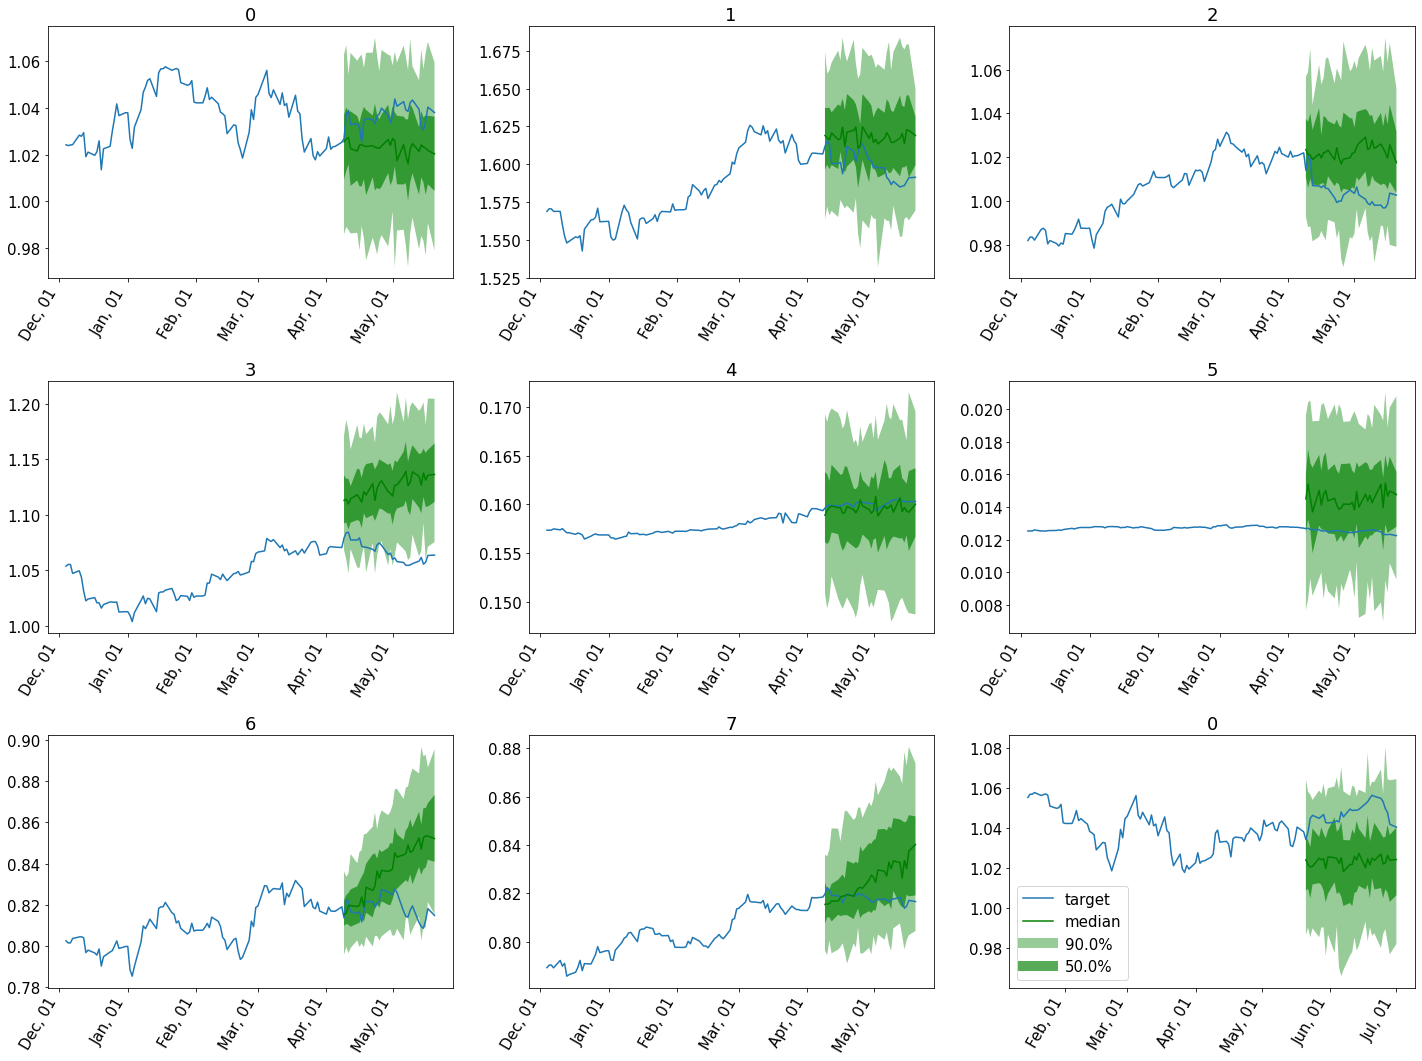

In [34]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)

    plt.plot(ts[-4 * dataset.metadata.prediction_length:], label="target", )
    forecast.plot( color='g')
    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()

In [36]:
metrics = pd.read_csv("lightning_logs/version_34/metrics.csv")

In [37]:
metrics

,train_perplexity,epoch,step,val_loss,train_loss
0,1.077298,0,49,NaN,NaN
1,1.052201,0,99,NaN,NaN
2,NaN,0,99,-3.059156,NaN
3,NaN,0,99,NaN,-1.421714
4,1.064031,1,149,NaN,NaN
...,...,...,...,...,...
395,NaN,98,9899,NaN,-4.208968
396,27.830784,99,9949,NaN,NaN
397,26.394091,99,9999,NaN,NaN
398,NaN,99,9999,-4.432779,NaN


Text(0, 0.5, 'perplexity')

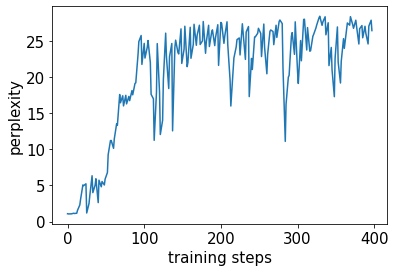

In [38]:
ax = metrics.train_perplexity.dropna().plot(kind="line")
ax.set_xlabel("training steps")
ax.set_ylabel("perplexity")

Text(0, 0.5, 'val neg. log likelihood')

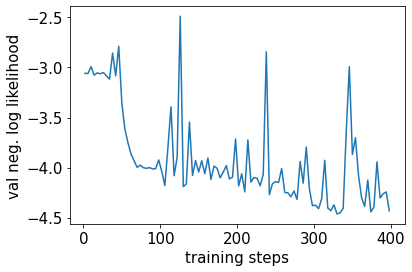

In [39]:
ax = metrics.val_loss.dropna().plot()
ax.set_xlabel("training steps")
ax.set_ylabel("val neg. log likelihood")

In [16]:
X = predictor.prediction_net.vq_vae.embed.cpu()

In [17]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

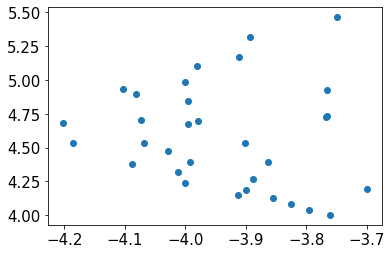

In [18]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=1.0)